In [1]:
#모델링 
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [3]:
seoul = pd.read_csv("seoul.csv")

In [4]:
df_x = seoul[seoul.columns[1:]]  #독립변수
df_y = seoul['분양가격(㎡)']  #종속변수()

In [5]:
train_x, test_x, train_y, test_y = train_test_split(
        df_x, df_y, test_size=0.1, random_state=1
)

In [10]:
#회귀분석
from sklearn.linear_model import LinearRegression
#클래스 객체 생성
model = LinearRegression(fit_intercept=True) 

# 모형 추정(상수항 결합을 자동으로 해줌)
model= model.fit(train_x, train_y)
# test하는 독립변수값을 넣었을때 예측된 분양가격 데이터
pred_y= model.predict(test_x)

In [11]:
seoul.head(1)

,분양가격(㎡),date,신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google
0,5841.0,201510,1.57,100.33,102.5,17.25


In [12]:
# 독립변수를 넣었을때 실제 분양가격과 비슷한 값이 나온다
model.predict([[201510,1.57,100.33,102.5,17.25]])

array([5608.91901098])

In [13]:
# test하는 독립변수값을 넣었을때 예측된 분양가격 데이터
pred_y

array([6473.4302131 , 6469.24555848, 7428.49853495, 6923.19146609,
       5710.31996885])

In [14]:
# 실제 분양가격 데이터
test_y

24    6578.0
22    6172.0
39    7627.0
35    7378.0
2     6041.0
Name: 분양가격(㎡), dtype: float64

In [15]:
# Mean Absolute Error(MAE)
# 모델의 예측값과 실제값의 차이를 모두 더하여 n으로 나눈값
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_y, pred_y)
round(mae, 2)

277.16

#### 결론 1)
- 금리, 소비자물가지수, 산업생산지수, 부동산 정책에 관한 이슈를 기반으로 아파트 분양가격에 영향을 미치며,선형회귀분석을 통해 가격을 설명할 수 있다.
- model.predict를 사용하면 아파트 가격을 예측할 수 있다
- 단 , 이때의 오차는 약 277천원/㎡(?) 277만원/㎡(?) 이다

In [28]:
seoul_gyunggi = pd.read_csv("seoul_gyunggi.csv")

In [29]:
# 서울경기
df_x = seoul_gyunggi[seoul_gyunggi.columns[1:]]  #독립변수
df_y = seoul_gyunggi['분양가격(㎡)']  #종속변수()
train_x, test_x, train_y, test_y = train_test_split(
        df_x, df_y, test_size=0.1, random_state=1
)

#클래스 객체 생성
model = LinearRegression(fit_intercept=True) 

# 모형 추정(상수항 결합을 자동으로 해줌)
model= model.fit(train_x, train_y)

# test하는 독립변수값을 넣었을때 예측된 분양가격 데이터
pred_y = model.predict(test_x)

In [30]:
# Mean Absolute Error(MAE)
# 모델의 예측값과 실제값의 차이를 모두 더하여 n으로 나눈값
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_y, pred_y)
round(mae, 2)

1598.89

#### 서울 모델링과 서울&경기 모델링 한 결과를 비교하면 후자의 경우 MAE가 더 커진것을 알 수 있다.
#### 그 이유는 지역별 분양가격에서 힌트를 찾을 수 있다.

In [44]:
master_table = pd.read_csv("result.csv")
master_table.head(2)

,분양가격(㎡),지역명,규모구분,date,신규취급액기준 COFIX,CPI총지수,전산업생산지수(원지수),google
0,5841.0,서울,전체,201510,1.57,100.33,102.5,17.25
1,5652.0,서울,전용면적 60㎡이하,201510,1.57,100.33,102.5,17.25


In [72]:
result_pv=master_table.pivot_table("분양가격(㎡)",["date"],["지역명"], aggfunc=np.mean)
result_pv.index=result_pv.index.astype("str")
result_pv.head(3)

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
date,,,,,,,,,,,,,,,,,
201510,2179.4,3335.8,2547.8,2205.4,2370.666667,2629.4,2482.0,3103.6,5795.0,2641.4,2831.2,3344.6,2080.0,2172.8,2403.50,2318.2,2091.0
201511,2177.6,3298.8,2568.6,2294.4,2373.000000,2671.6,2482.0,3169.2,6395.4,2655.8,2842.4,3316.8,2050.4,2180.4,2403.50,2282.0,2017.0
201512,2177.6,3420.8,2573.8,2285.8,2453.333333,2898.0,2482.0,3161.2,6278.4,2671.0,2842.4,3316.8,2050.4,2110.8,2421.25,2390.6,2100.0


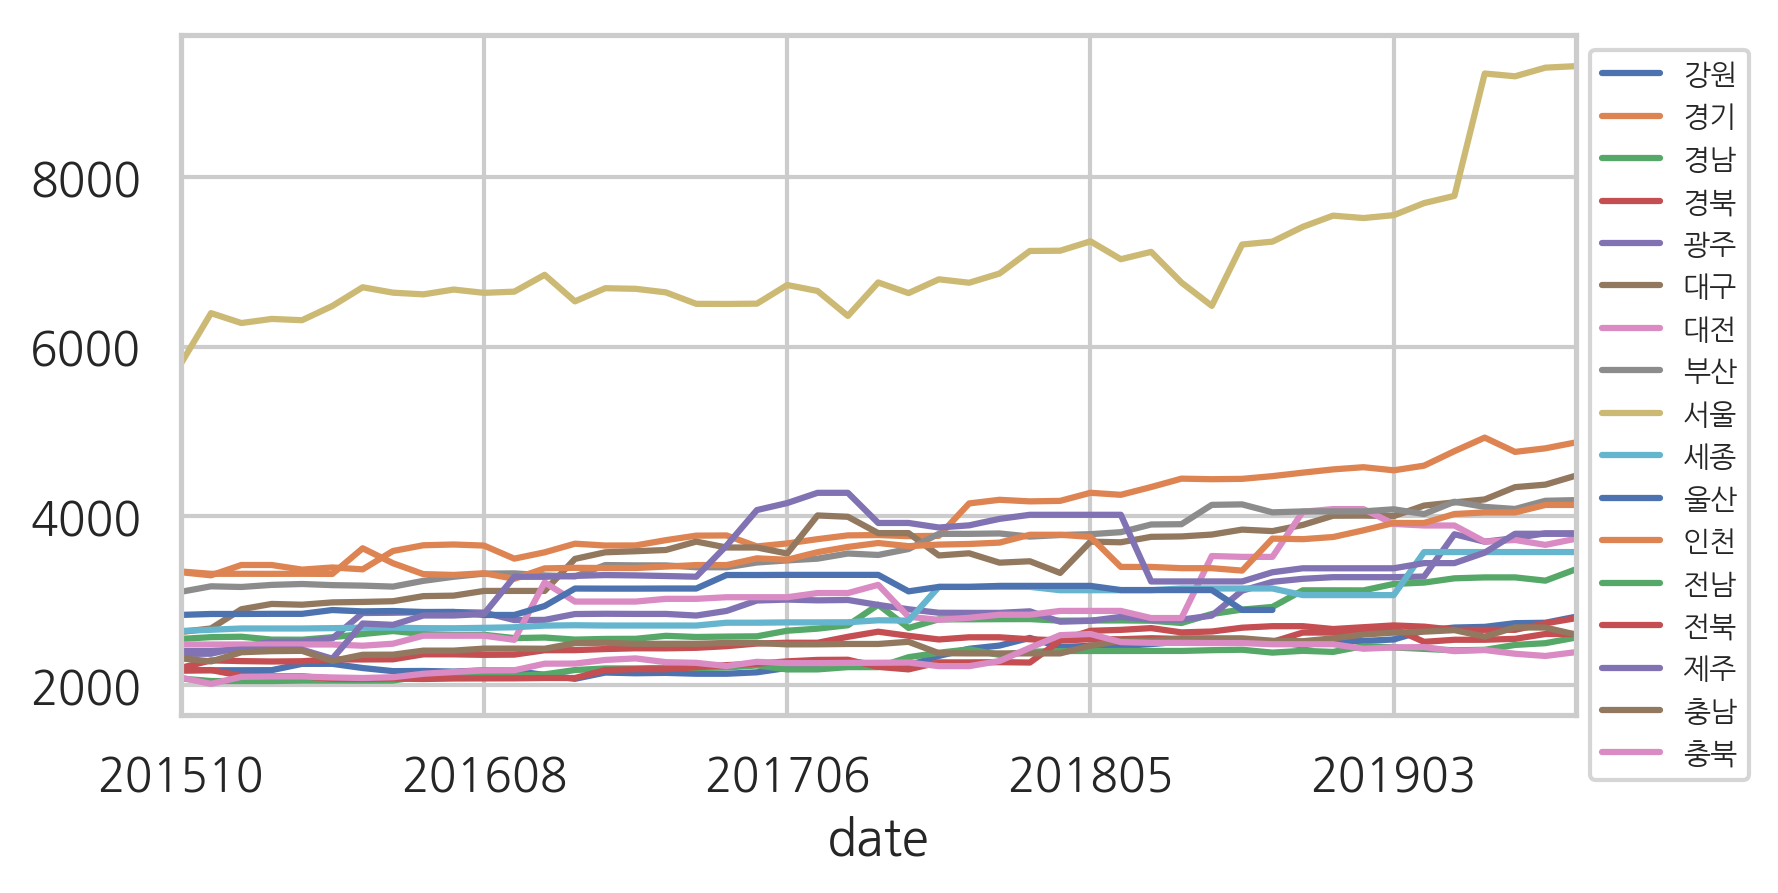

In [73]:
result_pv.plot()
plt.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0), fontsize='x-small')
plt.show()

In [77]:
result_pv=master_table.pivot_table("분양가격(㎡)",["규모구분"],["지역명"], aggfunc=np.mean)
result_pv.index=result_pv.index.astype("str")

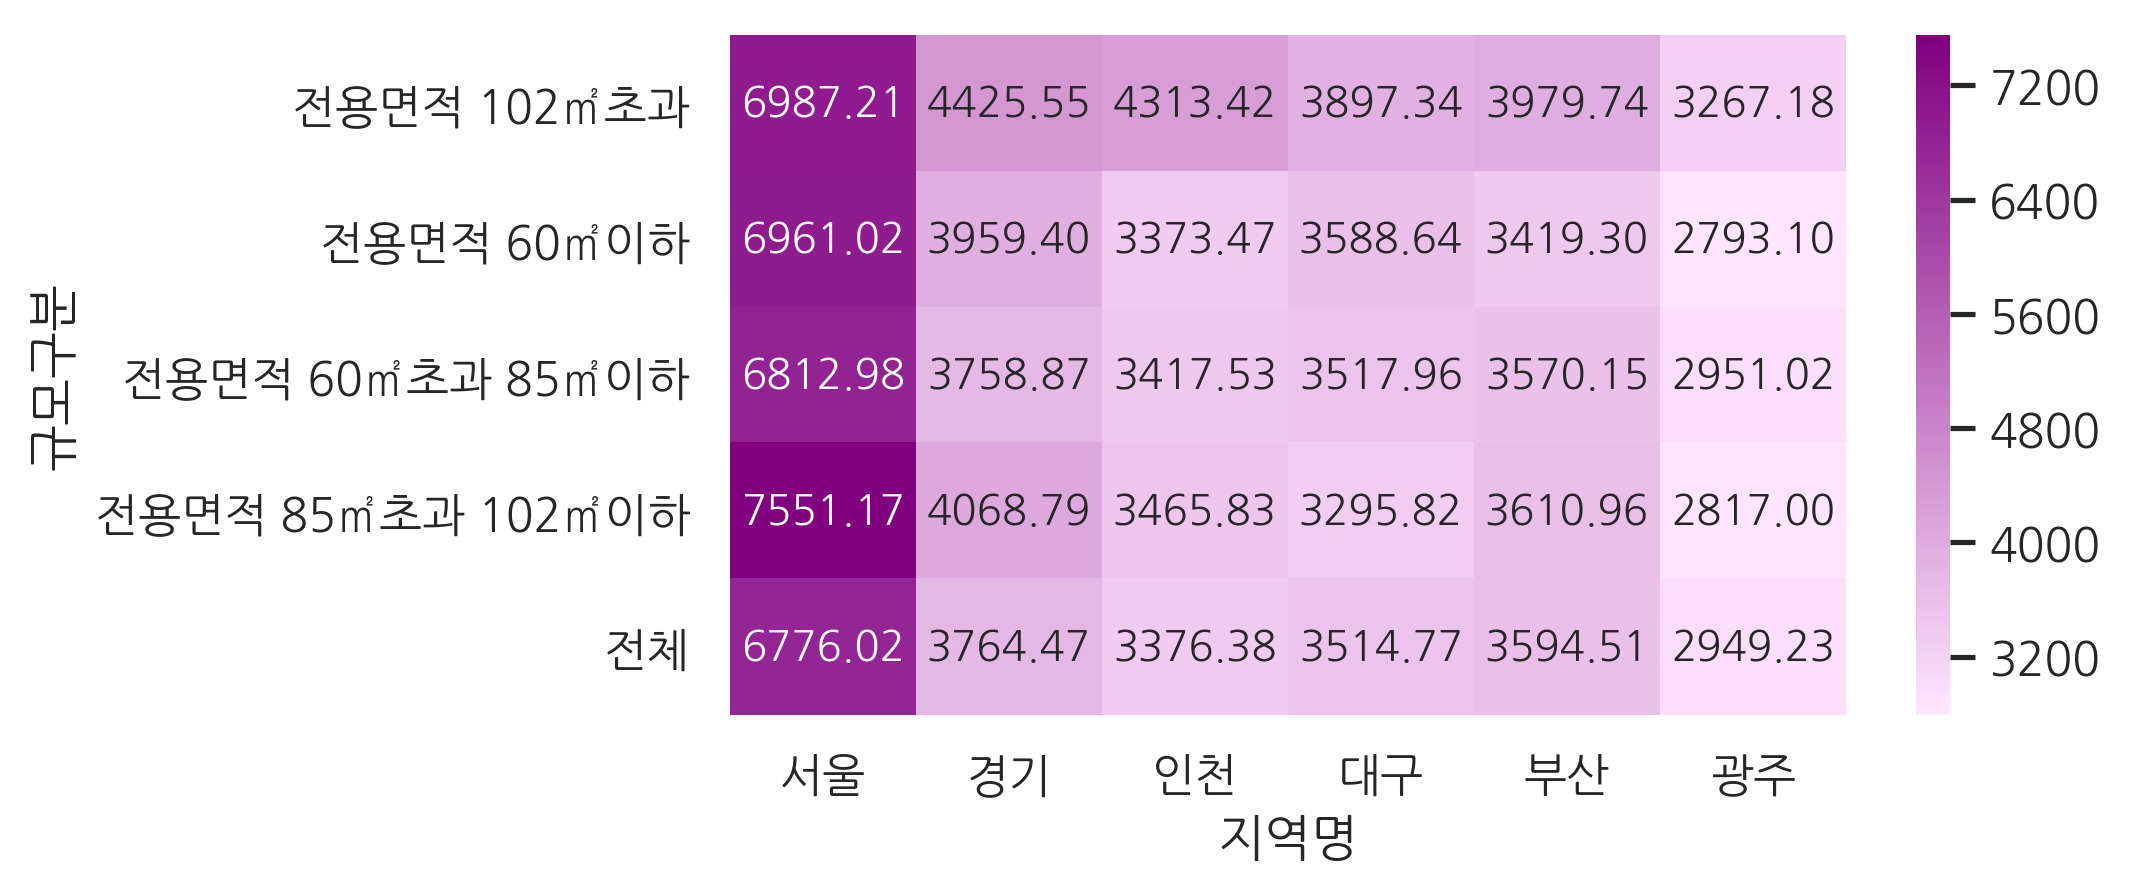

In [78]:
a = result_pv[["서울","경기","인천","대구","부산","광주"]]
sns.heatmap(a, cmap=sns.light_palette(
    "purple", as_cmap=True), annot=True, fmt=".2f")
plt.show()